# Diabetes Prediction

<img src="https://storage.googleapis.com/kaggle-datasets-images/4518323/7732204/7b11c30242e7ca1282b25d31892b3d1e/dataset-cover.png?t=2024-03-01-00-30-23">

## Data Description:
**Dataset Features:**
- **Pregnancies:** To express the Number of pregnancies
- **Glucose:** To express the Glucose level in blood
- **BloodPressure:** To express the Blood pressure measurement
- **SkinThickness:** To express the thickness of the skin
- **Insulin:** To express the Insulin level in blood
- **BMI:** To express the Body mass index
- **DiabetesPedigreeFunction:** To express the Diabetes percentage
- **Age:** To express the age
- **Outcome:** To express the final result 1 is YES o is NO

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Summary Statistics](#3.1)**
- **[4: EDA](#eda)**
   - **[4.1: Unvariate Analysis](#4.1)**
   - **[4.2: Bivariate Analysis](#4.2)**
- **[5: Data Preprocessing](#5)**
   - **[5.1: Irrelevant Features Removal](#5.1)**
   - **[5.2: Missing Value Treatment](#5.2)**
   - **[5.3: Handle Noisy Data](#5.3)**
   - **[5.4: Outlier Treatment](#5.4)**
   - **[5.5: Check Imbalanced Data](#5.5)**
   - **[5.6: Split the Dataset](#5.6)**
- **[6: Decision Tree Model Building](#6)**
   - **[6.1: DT Hyperparameter Tuning](#6.1)**
   - **[6.2: DT Model Evaluation](#6.2)**
- **[7: Random Forest Model Building](#7)**
   - **[7.1: RF Hyperparameter Tuning](#7.1)**
   - **[7.2: RF Hyperparameter Tuning](#7.2)**
- **[8: XGBoost Model Building](#8)**
   - **[8.1: XGBoost Hyperparameter Tuning](#8.1)**
   - **[8.2: XGBoost Hyperparameter Tuning](#8.2)**
- **[9: Conclusion](#9)**
 
   

<div id = "1" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">1: Import Libraries</h2>
</div>

In [16]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 10.5 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/10.6 MB 11.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/10.6 MB 11.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/10.6 MB 11.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.6 MB 11.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/10.6 MB 11.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 11.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 11.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.6 MB 11.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 11.9 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/10.6 MB 11.6 MB/s eta 0:

In [17]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
import sklearn
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./diabetes-prediction-98-accuracy-with-tree-models.ipynb
./requirements.txt
./Testing.csv
./Training.csv
./.venv\.gitignore
./.venv\pyvenv.cfg
./.venv\Lib\site-packages\decorator.py
./.venv\Lib\site-packages\distutils-precedence.pth
./.venv\Lib\site-packages\ipykernel_launcher.py
./.venv\Lib\site-packages\jupyter.py
./.venv\Lib\site-packages\nest_asyncio.py
./.venv\Lib\site-packages\numpy-1.26.4-cp311-cp311-win_amd64.whl
./.venv\Lib\site-packages\pylab.py
./.venv\Lib\site-packages\pythoncom.py
./.venv\Lib\site-packages\PyWin32.chm
./.venv\Lib\site-packages\pywin32.pth
./.venv\Lib\site-packages\pywin32.version.txt
./.venv\Lib\site-packages\scipy-1.12.0-cp311-cp311-win_amd64.whl
./.venv\Lib\site-packages\six.py
./.venv\Lib\site-packages\threadpoolctl.py
./.venv\Lib\site-packages\adodbapi\adodbapi.py
./.venv\Lib\site-packages\adodbapi\ado_consts.py
./.venv\Lib\site-packages\adodbapi\apibase.py
./.venv\Lib\site-packages\adodbapi\is64bit.py
./.venv\Lib\site-packages\adodbapi\license.txt
./.

<div id = "2" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">2: Read Dataset</h2>
</div>

In [20]:
# Load training and testing datasets
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")


# Combine both datasets into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)

# Reset index to ensure it's ordered correctly
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<div id = "3" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">3: Dataset Overview</h2>
</div>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference</b>:<br>
* The dataset contains <b>2768</b> entries.<br>
* Each entry represents a patient's medical information related to diabetes.<br>
* There are <b>9</b> columns in the dataset.<br>
* The columns represent various features such as number of pregnancies (Pregnancies), glucose level (Glucose), blood pressure (BloodPressure), skin thickness (SkinThickness), insulin level (Insulin), body mass index (BMI), diabetes pedigree function (DiabetesPedigreeFunction), age (Age), and diabetes outcome (Outcome).<br>
* All columns have <b>2768 non-null</b> entries, indicating <b>no missing data</b>.<br>
* The target variable is '<b>Outcome</b>', which represents whether the patient has diabetes (1) or not (0).<br>
* The features include a mix of numerical data types (integers and floats).<br>
* The dataset is well-prepared with no missing values, which is crucial for accurate analysis and modeling.<br>
* Further analysis could involve exploring relationships between different features and the outcome variable, as well as building predictive models to classify patients based on their diabetes status.<br>
    
</div>


<div id = "3.1" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">3.1: Summary Statistics</h2>
</div>

In [23]:
df.describe().T

count        mean         std     min      25%  \
Pregnancies               2768.0    3.822616    3.305432   0.000    1.000   
Glucose                   2768.0  121.421965   31.721258   0.000  100.000   
BloodPressure             2768.0   68.980491   19.133100   0.000   64.000   
SkinThickness             2768.0   20.549494   15.779713   0.000    0.000   
Insulin                   2768.0   79.853324  115.655771   0.000    0.000   
BMI                       2768.0   31.976590    7.760540   0.000   27.175   
DiabetesPedigreeFunction  2768.0    0.486277    0.357403   0.078    0.248   
Age                       2768.0   32.923049   11.362964  21.000   24.000   
Outcome                   2768.0    0.380419    0.485578   0.000    0.000   

                             50%        75%     max  
Pregnancies                 3.00    6.00000   17.00  
Glucose                   117.00  142.00000  199.00  
BloodPressure              71.00   80.00000  122.00  
SkinThickness              23.00   33.00000   99.00  
Insulin                    36.00  129.00000  846.00  
BMI                        32.10   36.50000   67.10  
DiabetesPedigreeFunction    0.38    0.64525    2.42  
Age                        29.00   40.00000   81.00  
Outcome                     0.00    1.00000    1.00

<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference</b>:<br>

- <b>Pregnancies</b>: The mean number of pregnancies is approximately <b>3.82</b>, with a standard deviation of <b>3.31</b>. The number of pregnancies ranges from <b>0</b> to <b>17</b>.<br>
- <b>Glucose</b>: The mean glucose level is approximately <b>121.42 mg/dL</b>, with a standard deviation of <b>31.72</b>. Glucose levels range from <b>0</b> to <b>199</b>.<br>
- <b>BloodPressure</b>: The mean blood pressure is approximately <b>68.98 mmHg</b>, with a standard deviation of <b>19.13</b>. Blood pressure ranges from <b>0</b> to <b>122</b>.<br>
- <b>SkinThickness</b>: The mean skin thickness is approximately <b>20.55 mm</b>, with a standard deviation of <b>15.78</b>. Skin thickness ranges from <b>0</b> to <b>99</b>.<br>
- <b>Insulin</b>: The mean insulin level is approximately <b>79.85 IU/mL</b>, with a standard deviation of <b>115.66</b>. Insulin levels range from <b>0</b> to <b>846</b>.<br>
- <b>BMI</b>: The mean BMI is approximately <b>31.98</b>, with a standard deviation of <b>7.76</b>. BMI ranges from <b>0</b> to <b>67.10</b>.<br>
- <b>DiabetesPedigreeFunction</b>: The mean diabetes pedigree function is approximately <b>0.49</b>, with a standard deviation of <b>0.36</b>. The function ranges from <b>0.08</b> to <b>2.42</b>.<br>
- <b>Age</b>: The mean age is approximately <b>32.92</b> years, with a standard deviation of <b>11.36</b>. Age ranges from <b>21</b> to <b>81</b>.<br>
* The target variable is '<b>Outcome</b>', which represents whether the patient has diabetes (1) or not (0). The mean outcome indicates that approximately <b>38.04%</b> of patients in the dataset have diabetes.
</div>


<div style="background-color: #cce5ff;padding:10px 12px">

<b>Noisy Data Features:</b><br>
Based on the descriptions and the inferences provided earlier, the following features seem to contain noisy data:<br>

- <b>Blood Pressure (BloodPressure):</b><br>
It's highly unlikely for blood pressure to be zero in a healthy individual. A reading of zero in this context likely represents missing or erroneous data rather than an actual physiological measurement.<br>

- <b>Skin Thickness (SkinThickness):</b><br>
While it's possible for some individuals to have very low skin thickness measurements, a value of zero is uncommon and could indicate missing or inaccurate data.<br>

- <b>Insulin Level (Insulin):</b><br>
Similarly, it's improbable for insulin levels to be zero, especially in individuals with diabetes. Zero values for insulin could indicate missing data or measurement errors.<br>

- <b>Body Mass Index (BMI):</b><br>
BMI is calculated based on height and weight, and a BMI of zero is physiologically impossible. Zero values here may also represent missing or erroneous data.<br>

</div>


<div id = "4" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">4: EDA</h2>
</div>

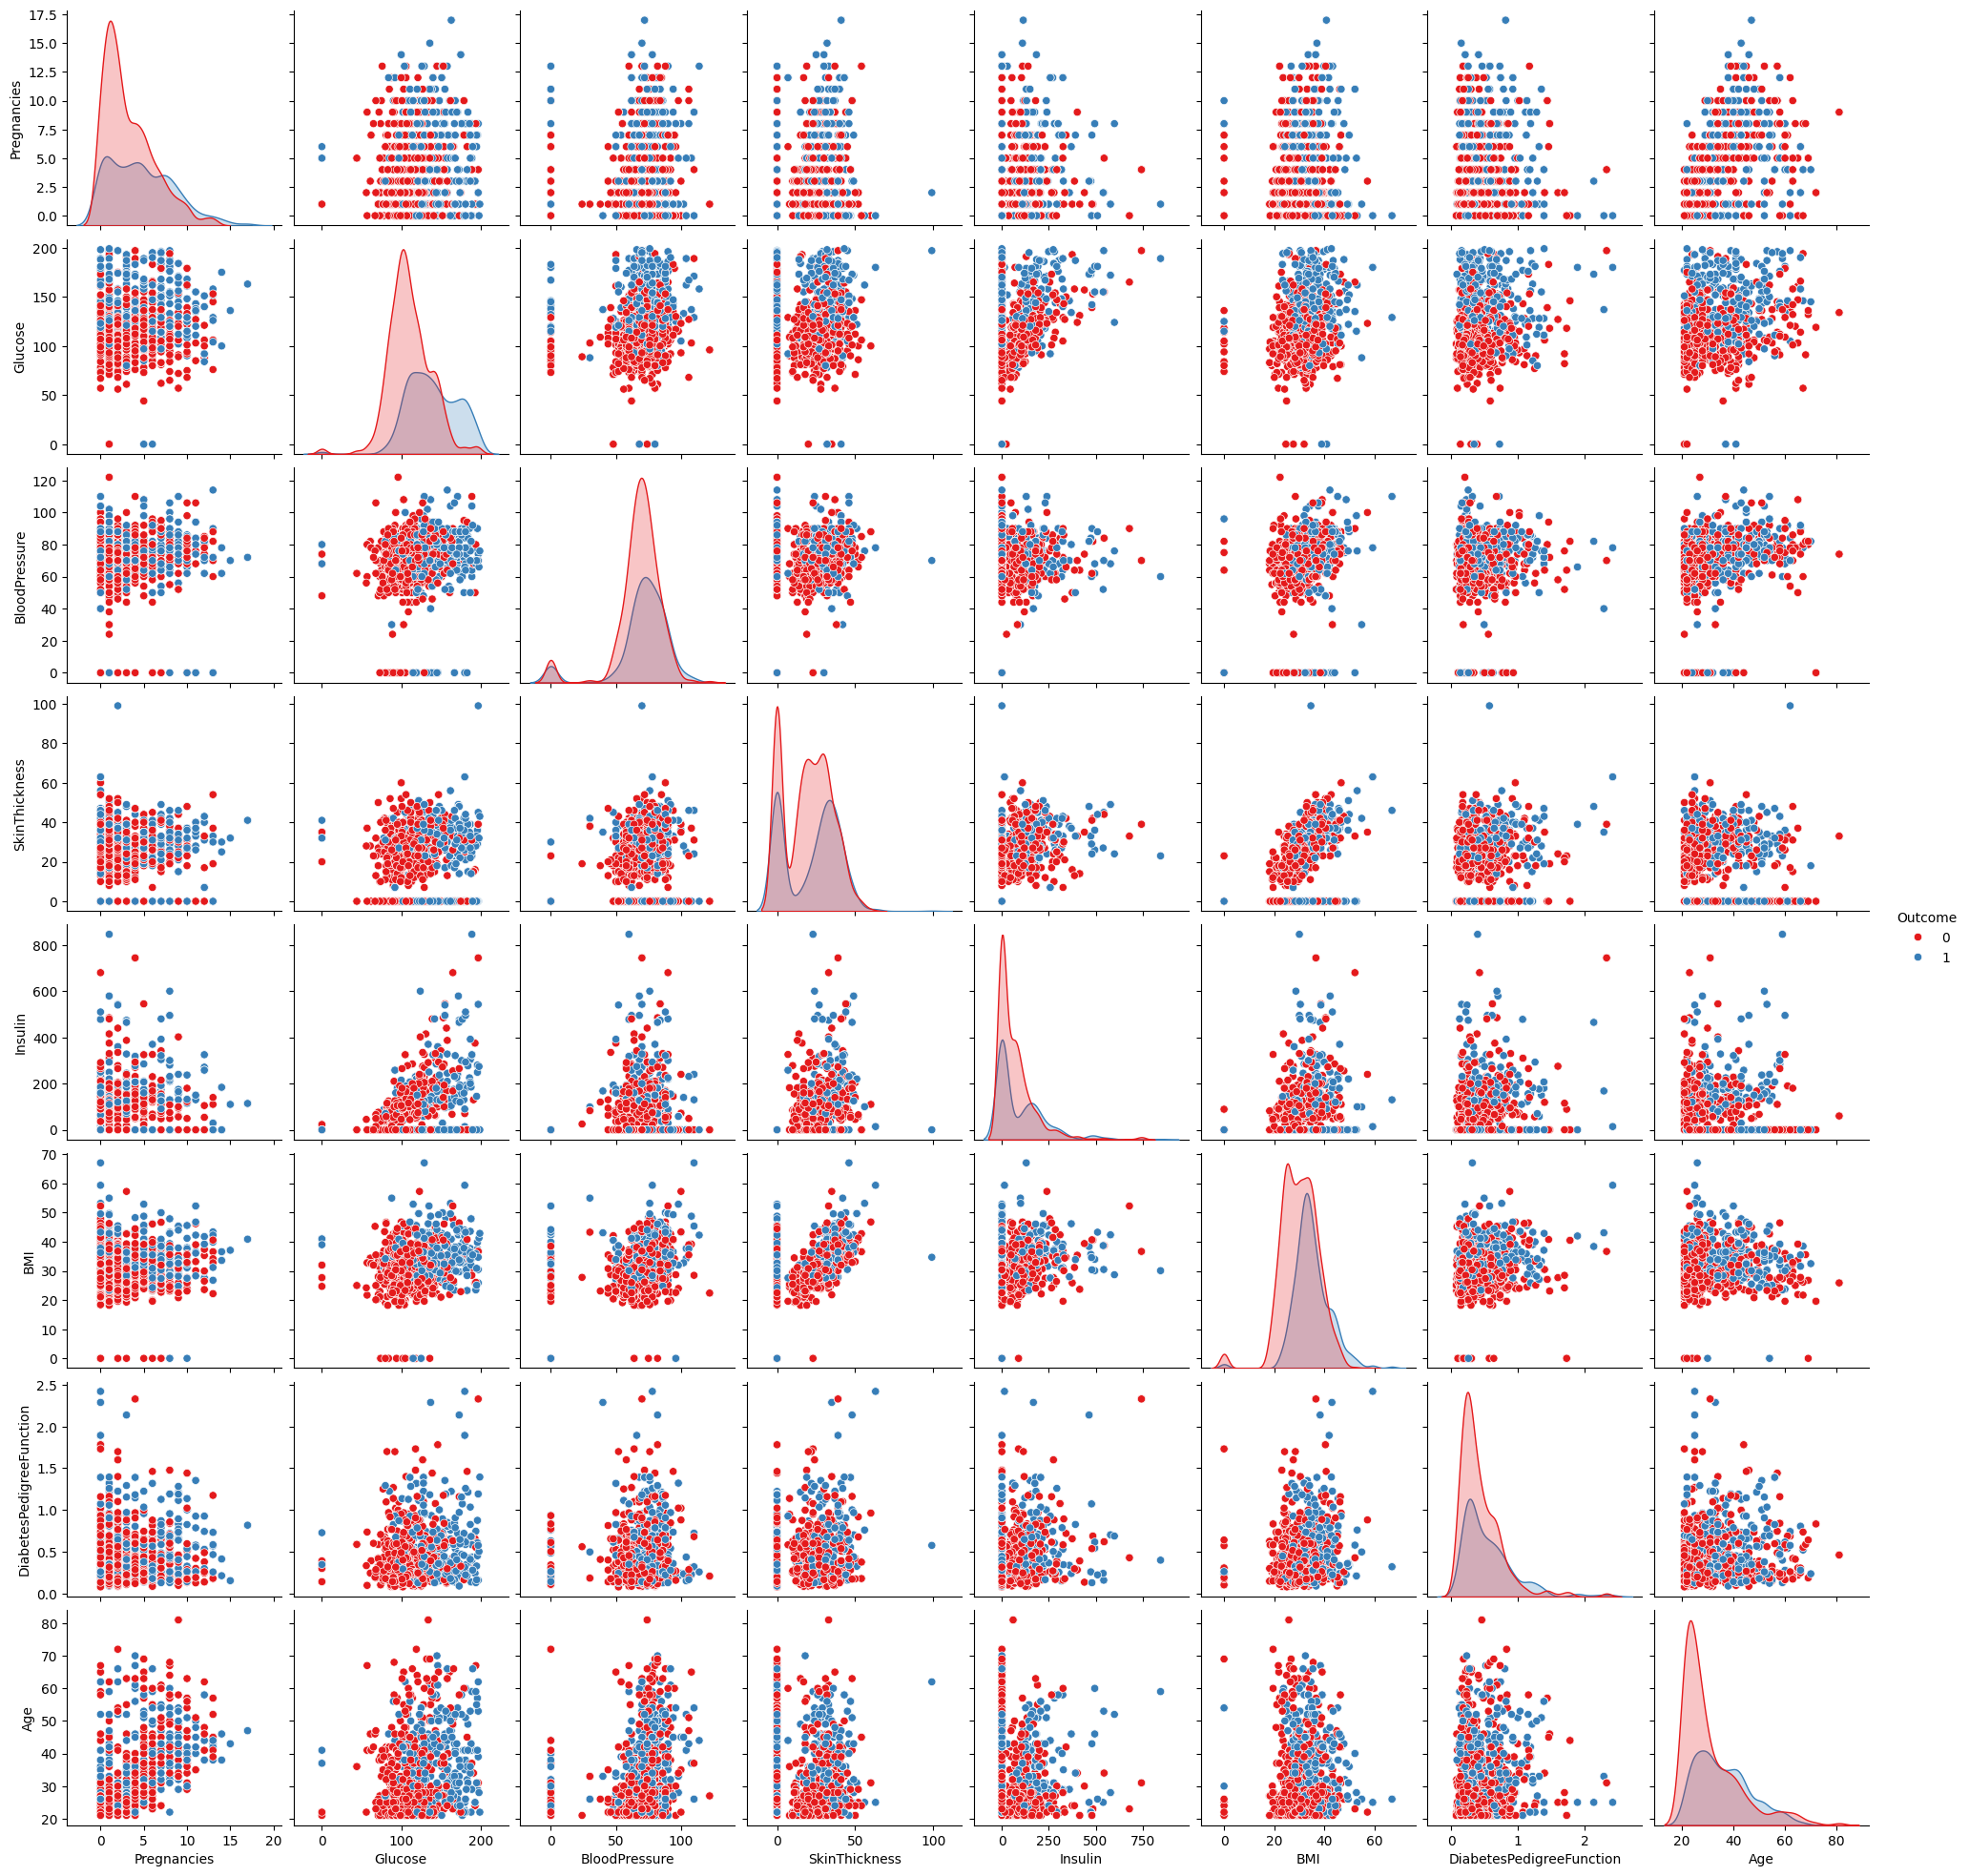

In [24]:
sns.pairplot(df, hue='Outcome',palette ='Set1')

<a id="4.1"></a>
## 4.1: Unvariate Analysis

###  Numerical variables

In [25]:
numerical_columns = df.drop(columns=['Outcome']).columns
df_numerical = df[numerical_columns]

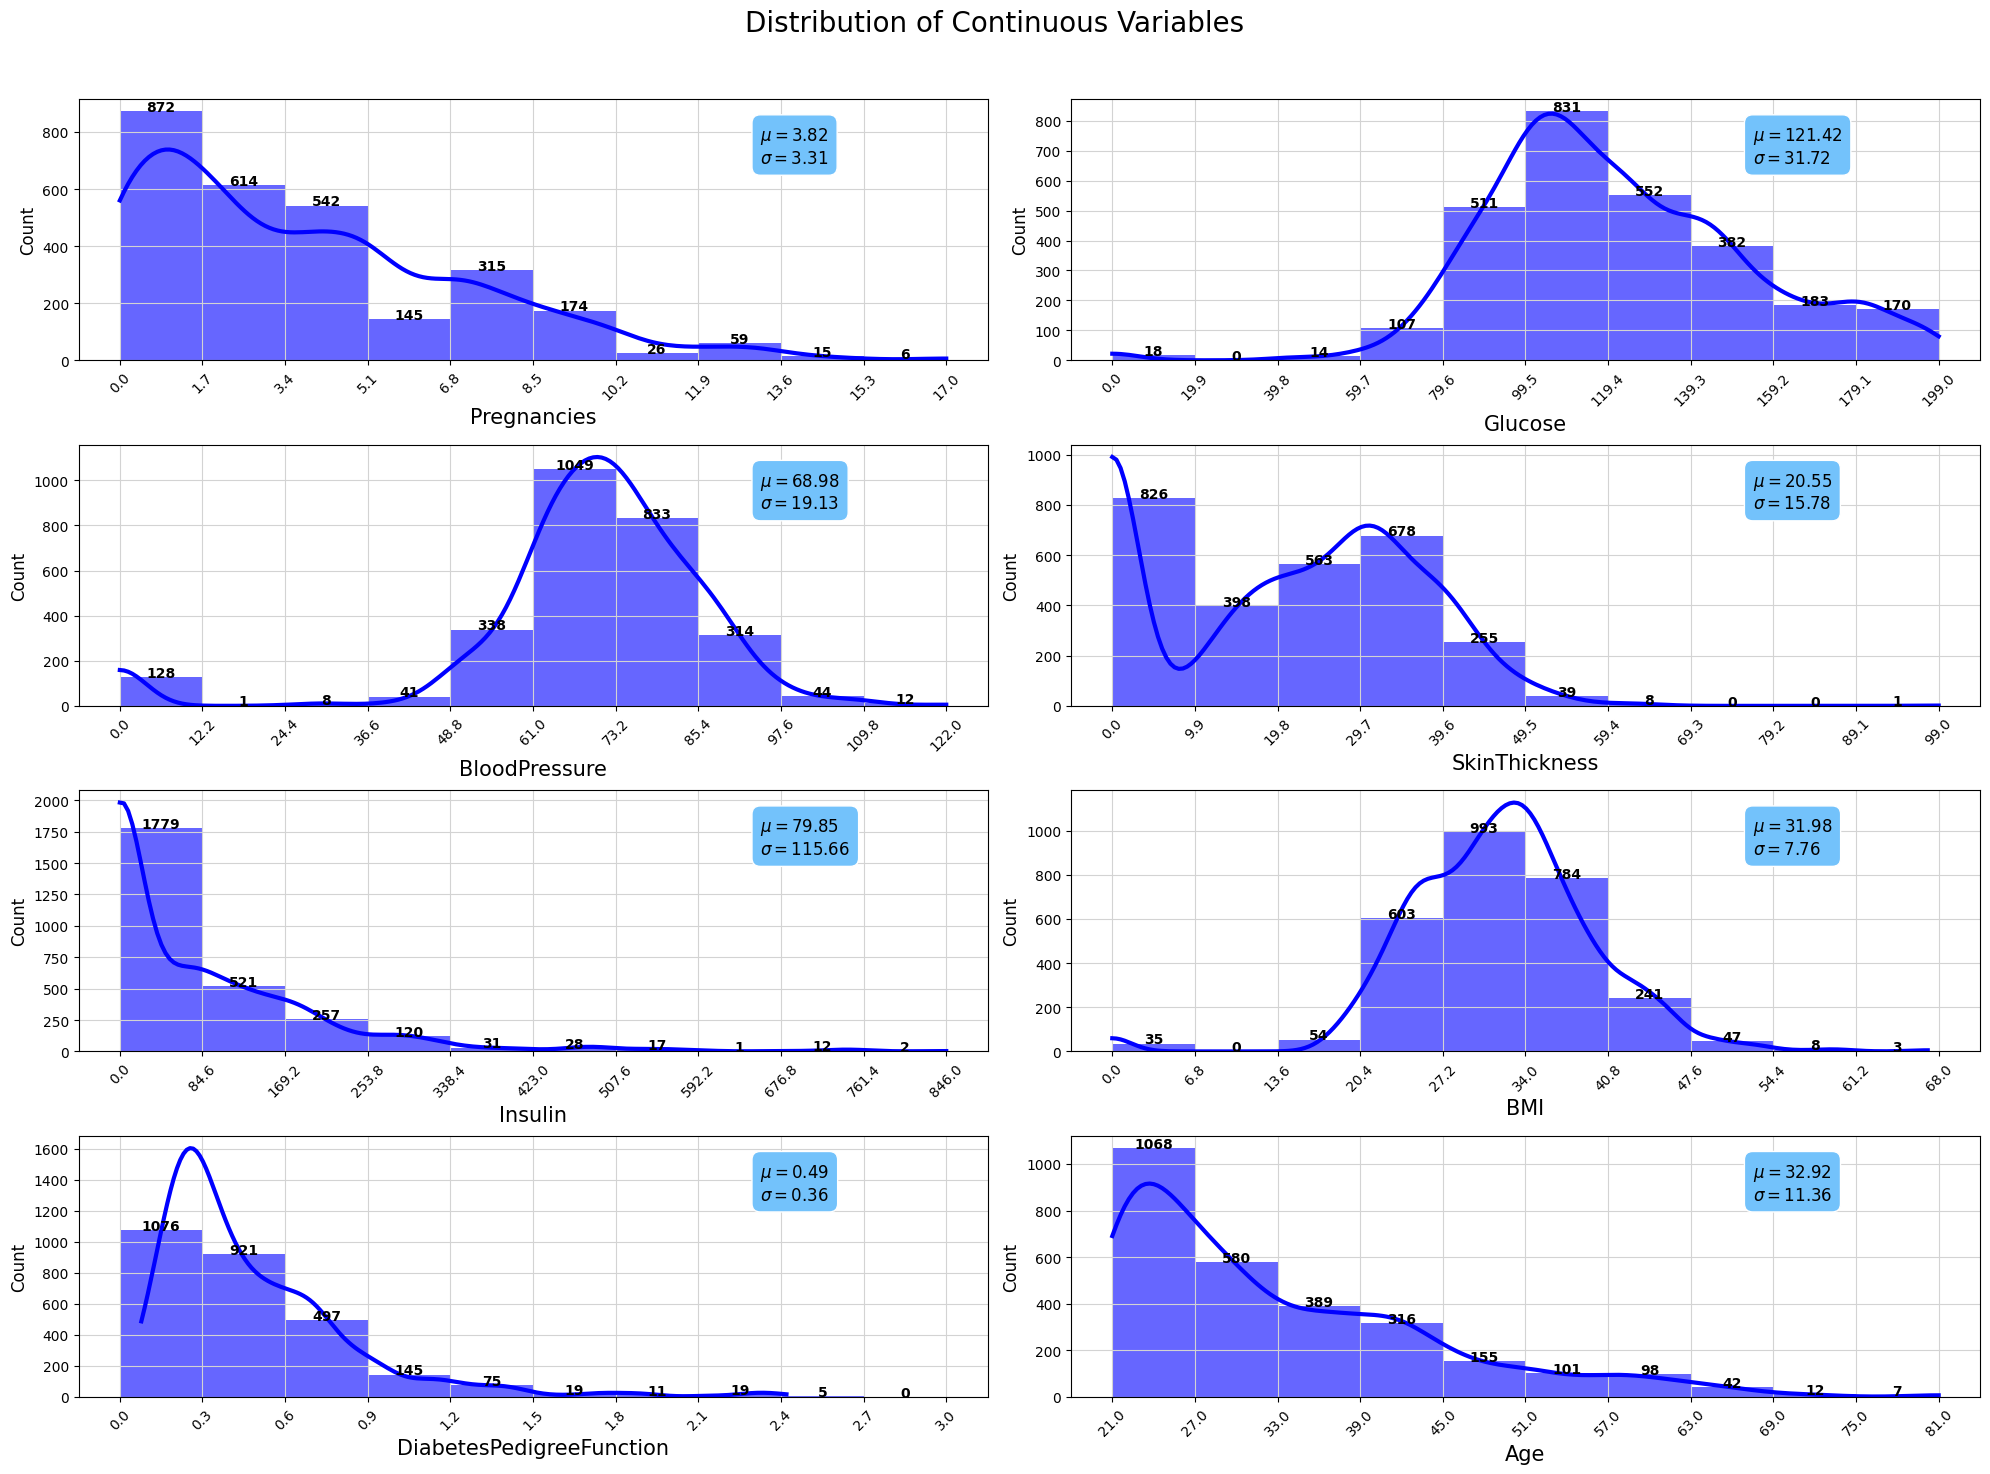

In [9]:
# Set up the subplot
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_numerical.columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df_numerical[col], 
                                     range=(np.floor(df[col].min()), np.ceil(df_numerical[col].max())))
    
    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_numerical[col].mean(),
        r'$\sigma=%.2f$' % df_numerical[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='black', bbox=dict(boxstyle='round', facecolor='#73c2fb', edgecolor='white', pad=0.5))


plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference</b>:<br>
* <b>Pregnancies</b>:
  - The distribution is right-skewed, indicating that most individuals in the dataset have fewer pregnancies.<br>
  - The majority of values are between 0 to 1.7, suggesting that many individuals have either not been pregnant or have had a small number of pregnancies.<br>
* <b>Glucose</b>:
  - The distribution appears somewhat normal, with a peak between 85 to 125 mg/dL.<br>
  - This peak suggests that a significant number of individuals have glucose levels within this range, which is expected in a population without diabetes.<br>
* <b>Blood Pressure</b>:
  - The distribution also appears somewhat normal, with a peak between 61 to 75 mmHg.<br>
  - This peak indicates that a substantial proportion of individuals have blood pressure readings within this range, which is considered normal for many adults.<br>
* <b>SkinThickness</b>:
  - The distribution shows two peaks, with one peak starting at 0, going down at 8, and then going up to 29 mm.<br>
  - This bimodal distribution suggests that there may be two distinct groups of individuals in the dataset with different skin thickness measurements.<br>
* <b>Insulin</b>:
  - The distribution is right-skewed, indicating that most individuals have lower insulin levels.<br>
  - The majority of values are between 0 to 70 IU/mL, suggesting that many individuals have relatively low insulin levels, although there is a right tail indicating some individuals with higher insulin levels.<br>
* <b>BMI (Body Mass Index)</b>:
  - The distribution appears somewhat normal, indicating that BMI values are spread across a range of values.<br>
  - This distribution suggests that there is variability in BMI among individuals in the dataset, with some having lower values and others having higher values.<br>
* <b>DiabetesPedigreeFunction</b>:
  - The distribution is right-skewed, indicating that most individuals have lower values for the diabetes pedigree function.<br>
  - The majority of values are concentrated on the lower end of the distribution, suggesting that many individuals have lower genetic predispositions to diabetes.<br>
* <b>Age</b>:
  - The distribution is right-skewed, indicating that most individuals in the dataset are younger.<br>
  - The majority of values are between 21 to 27 years, suggesting that many individuals in the dataset are relatively young adults.<br>

</div>


<a id="4.2"></a>
## 4.2: Bivariate Analysis

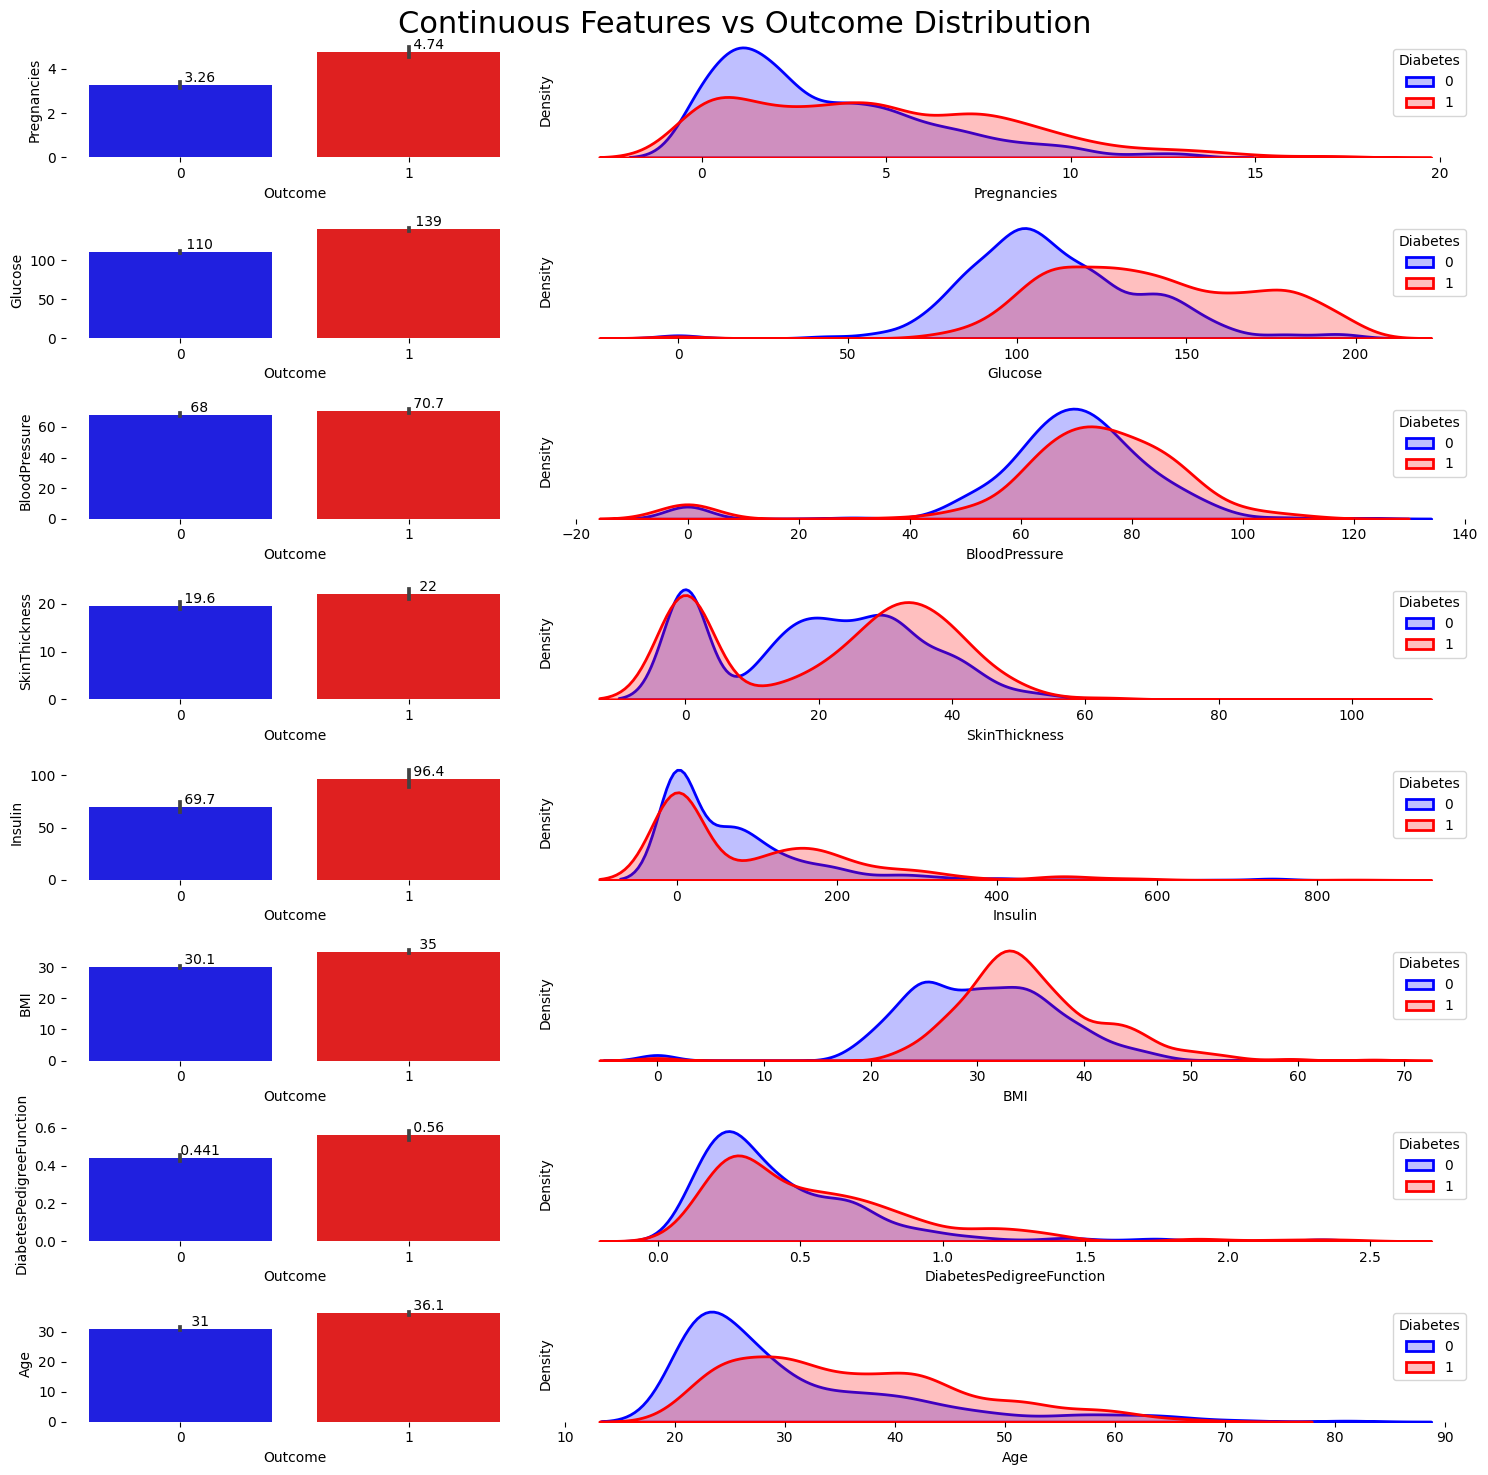

In [10]:
# Set color palette
sns.set_palette(['blue', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(numerical_columns), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(numerical_columns):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="Outcome", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["Outcome"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["Outcome"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Diabetes', loc='upper right')

    
    # Remove outer border barplot
    for spine in ax[i,0].spines.values():
        spine.set_visible(False)
        
    # Remove outer border kde plor
    for spine in ax[i,1].spines.values():
        spine.set_visible(False)
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Outcome Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference</b>:<br>
* <b>Pregnancies</b>:
  - People without diabetes have a higher peak compared to those with diabetes, but individuals with diabetes and pregnancies have a wider spread.<br>
  - The mean number of pregnancies is higher for individuals with diabetes compared to those without diabetes.<br>
  - <b>Inference</b>: The number of pregnancies appears to be important in predicting diabetes, as individuals with higher pregnancy counts tend to have a higher likelihood of diabetes.<br>
* <b>Glucose</b>:
  - Individuals with diabetes tend to have higher mean glucose levels compared to those without diabetes.<br>
  - <b>Inference</b>: Glucose levels are likely to be an important predictor of diabetes, as higher glucose levels are associated with a higher likelihood of diabetes.<br>
* <b>Blood Pressure</b> and <b>SkinThickness</b>:
  - The distribution of both features with respect to the outcome overlaps, indicating that they may not be strong predictors of diabetes on their own.<br>
  - <b>Inference</b>: Blood pressure and skin thickness alone may not have a significant impact on predicting diabetes.<br>
* <b>Insulin</b>:
  - The distribution of insulin levels is bimodal for both outcomes, but the mean insulin level is higher for individuals with diabetes compared to those without diabetes.<br>
  - <b>Inference</b>: Insulin levels may be an important predictor of diabetes, as higher insulin levels are associated with a higher likelihood of diabetes.<br>
* <b>BMI (Body Mass Index)</b>:
  - There is a noticeable peak in BMI for individuals with diabetes compared to those without diabetes.<br>
  - <b>Inference</b>: BMI could be an important predictor of diabetes, as higher BMI values are associated with a higher likelihood of diabetes.<br>
* <b>DiabetesPedigreeFunction</b>:
  - While the graphs overlap, the mean diabetes pedigree function is higher for individuals with diabetes.<br>
  - <b>Inference</b>: The diabetes pedigree function may be an important predictor of diabetes, as higher values are associated with a higher likelihood of diabetes.<br>
* <b>Age</b>:
  - The distribution spread of age is higher for individuals with diabetes, and the mean age is also higher for individuals with diabetes.<br>
  - <b>Inference</b>: Age appears to be an important predictor of diabetes, as older individuals are more likely to have diabetes.<br>
* Overall, features such as glucose levels, insulin levels, BMI, diabetes pedigree function, and age appear to have a greater impact on predicting diabetes compared to other features like pregnancies, blood pressure, and skin thickness. These features may be more important in developing predictive models for diabetes.<br>
</div>


<div id="5" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">5: Data Preprocessing</h2>
</div>

<a id="5.1"></a>
## 5.1: Irrelevant Features Removal
<br>
<div style="background-color: #cce5ff;padding:10px 12px">
    
All features in the dataset appear to be relevant based on our EDA. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost.

</div>

<a id="5.2"></a>
## 5.2: Missing Value Treatment

In [11]:
df.isnull().sum().sum()

0

<a id="5.3"></a>
## 5.3: Handle Noisy Data

<div style="background-color: #cce5ff;padding:10px 12px">
    
Now let's analyze and handle the <b>noisy data</b> in the `BloodPressure`, `skinThickness`, `Insulin`, and `BMI` columns as discussed in <b>step 3.1</b>:
</div>

In [30]:
# Analyze noisy data
noisy_data = {
    'BloodPressure':  df[df['BloodPressure'] == 0],
    'SkinThickness':   df[df['SkinThickness'] == 0],
    'Insulin': df[df['Insulin'] == 0],
    'BMI':   df[df['BMI'] == 0],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'BloodPressure': 128, 'SkinThickness': 810, 'Insulin': 1333, 'BMI': 35}

In [31]:
# Remove rows with 0 entries
df = df[df['BloodPressure'] != 0]
df = df[df['SkinThickness'] != 0]
df = df[df['Insulin'] != 0]
df = df[df['BMI'] != 0]

In [32]:
# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'BloodPressure':  df[df['BloodPressure'] == 0],
    'SkinThickness':   df[df['SkinThickness'] == 0],
    'Insulin': df[df['Insulin'] == 0],
    'BMI':   df[df['BMI'] == 0],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}

<a id="5.4"></a>
## 5.4: Outlier Treatment

In [33]:
numerical_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [29]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Pregnancies                  21
Glucose                      18
BloodPressure               161
SkinThickness                 1
Insulin                     109
BMI                          61
DiabetesPedigreeFunction    111
Age                          47
dtype: int64

<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference</b>:<br>
Upon identifying outliers for the specified continuous features, we found the following:

- <b>Pregnancies</b>: 42 outliers<br>
- <b>Glucose</b>: 5 outliers<br>
- <b>BloodPressure</b>: 32 outliers<br>
- <b>SkinThickness</b>: 5 outlier<br>
- <b>Insulin</b>: 79 outliers<br>
- <b>BMI</b>: 15 outliers<br>
- <b>DiabetesPedigreeFunction</b>: 65 outliers<br>
- <b>Age</b>: 70 outliers<br>

When using tree-based models such as decision trees, random forests, or gradient boosting, the impact of outliers is generally mitigated compared to linear models. Tree-based models are inherently robust to outliers because they make decisions based on splits in the data rather than on the actual magnitude of the features. 

However, there are still situations where outliers might affect the performance of tree-based models:

1. <b>Overfitting</b>: Outliers can sometimes lead to overfitting, particularly if they represent noisy data or erroneous measurements. In such cases, the model might learn to fit the outliers excessively, leading to poorer generalization performance.<br>

2. <b>Variable Importance</b>: Outliers can influence the calculation of variable importance in tree-based models. If outliers are not representative of the true underlying patterns in the data, they might distort the importance assigned to certain features.<br>

Given the nature of tree-based models, they are generally less sensitive to outliers compared to linear models. However, it's still important to consider the nature of the outliers and their potential impact on model performance. Outlier treatment might be necessary if outliers are extreme or if they significantly affect the interpretability or stability of the model.

In summary, while outliers may not require extensive treatment for tree-based models, it's still advisable to evaluate their impact and consider appropriate measures to ensure model robustness and performance.<br>
</div>


<a id="5.5"></a>
## 5.5: Check Imbalanced Data

In [34]:
df['Outcome'].value_counts()

Outcome
0    917
1    512
Name: count, dtype: int64

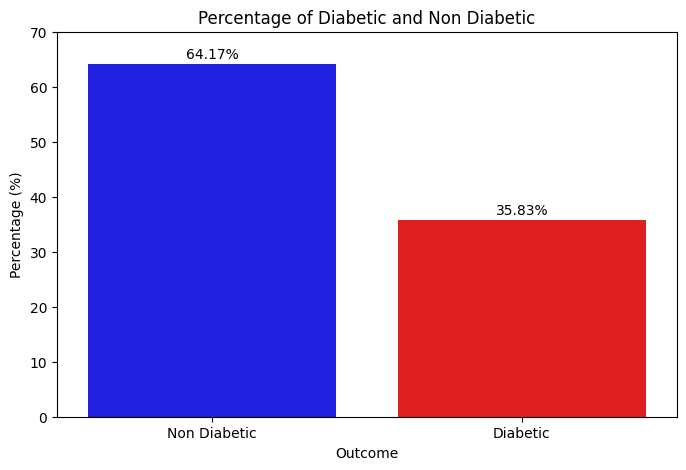

In [18]:
# Calculating the percentage of each class
percentage = df['Outcome'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage )
plt.title('Percentage of Diabetic and Non Diabetic')
plt.xlabel('Outcome')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Non Diabetic', 'Diabetic'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference</b>:<br>
The data exhibits class imbalance, with significantly more instances belonging to class 0 (64.17% Non Diabetic) compared to class 1 (35.83% Diabetic) in the target variable (Outcome).<br>

Class imbalance can pose challenges for predictive modeling, as algorithms may be biased towards the majority class and perform poorly on the minority class. Addressing class imbalance is crucial to ensure that the model's predictions are not skewed towards the majority class and to achieve better generalization performance.<br>

To mitigate class imbalance, we will use <b>stratified sampling during the data splitting process</b>. By using stratified sampling, we ensure that the proportion of instances in each class remains consistent across both the training and testing sets. This approach helps maintain the representative nature of the data and improves the reliability of model evaluation.<br>

Several techniques can be employed to address class imbalance, including resampling methods such as oversampling or undersampling, algorithmic approaches like ensemble methods, and cost-sensitive learning. Evaluation metrics such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC) should be used to assess model performance in the context of class imbalance.<br>

Before selecting a method to address class imbalance, it's essential to carefully consider the dataset's characteristics and the goals of the analysis. Additionally, evaluating the chosen method's performance using appropriate validation techniques is crucial to ensure effective mitigation of class imbalance without introducing other biases or issues.<br>

</div>


<a id="5.6"></a>
## 5.6: Split the Dataset

In [35]:
# Define the features (X) and the output labels (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome'] 

In [36]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [37]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Outcome
0    0.641295
1    0.358705
Name: proportion, dtype: float64
Outcome
0    0.643357
1    0.356643
Name: proportion, dtype: float64


<div id="6" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">6: Decision Tree Model Building</h2>
</div>

In [22]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

<div style="background-color: #FFCCCC;padding:10px 12px">
    
<b>📝 Note:</b><br>
In the context of diabetes prediction:<br>

- <b>Prioritize High Recall (Sensitivity) for Diabetic Patients</b>: Emphasize identifying most of the actual diabetic patients correctly, even if it leads to some false positives (healthy individuals being misclassified as diabetic). It's crucial to capture as many true diabetic cases as possible to ensure they receive timely care and management.<br>

- <b>Minimize False Negatives (FN)</b>: Aim to reduce instances where diabetic patients are missed by the model. Missing diabetic cases could result in delayed treatment, leading to adverse health outcomes.<br>

- <b>Balance Precision and Recall</b>: While minimizing false positives is important to avoid unnecessary interventions, prioritize achieving high recall to ensure diabetic patients are not overlooked by the model.<br>

By focusing on these aspects, the diabetes prediction model can effectively identify individuals at risk or already diagnosed with diabetes, facilitating early intervention and management for better health outcomes.<br>

</div>


<a id="6.1"></a>
## 6.1: DT Hyperparameter Tuning

In [42]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [24]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

In [25]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [26]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 4}


<a id="6.2"></a>
## 6.2: DT Model Evaluation

In [27]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [28]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap resembling an apple (red theme)
    apple_red = LinearSegmentedColormap.from_list('apple_red', [(0, '#FF0000'), (1, '#FFFFFF')])
    apple_red_r = apple_red.reversed() 
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=apple_red_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#FF0000')
    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00       410

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       184
           1       0.95      0.92      0.94       102

    accuracy                           0.95       286
   macro avg       0.95      0.95      0.95       286
weighted avg       0.95      0.95      0.95       286



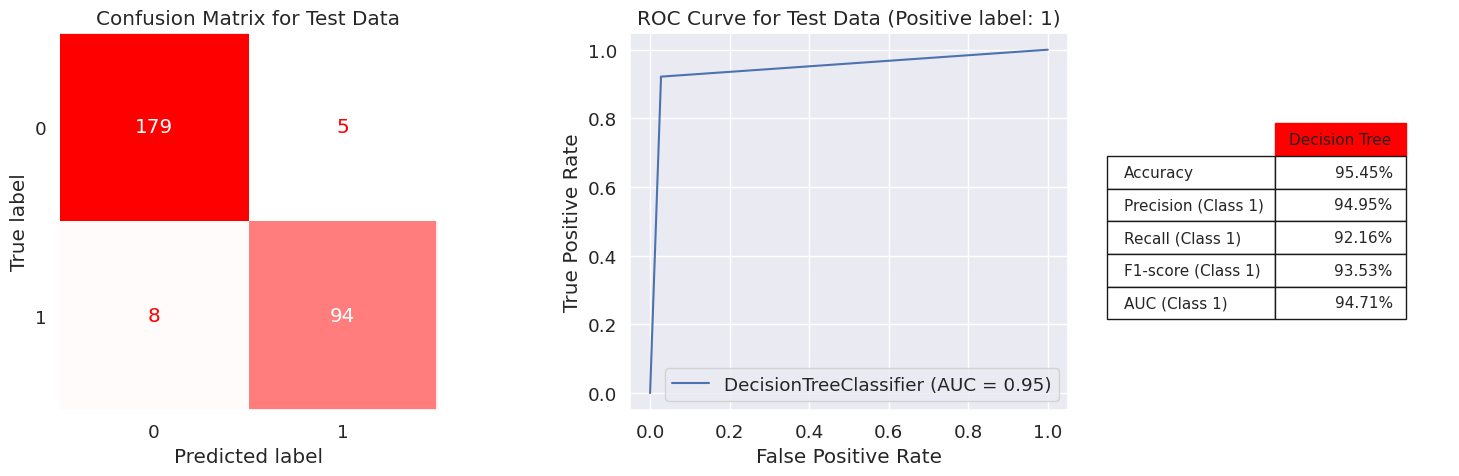

In [29]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

<div style="background-color: #cce5ff;padding:10px 12px">

<b>Inference:</b><br>

- <b>Accuracy</b>: 95.45%
  - The model correctly predicts whether an individual has diabetes or not about 95% of the time.<br>

- <b>Precision (class 1)</b>: 94.95%
  - 95% of the individuals predicted as diabetic by the model were actually diabetic.<br>

- <b>Recall (class 1)</b>: 92.16%
  - The model correctly identifies 92% of the actual diabetic individuals.<br>

- <b>F1-score (class 1)</b>: 93.53%
  - The harmonic mean of Precision and Recall.<br>

- <b>AUC (Area Under the ROC Curve) (class 1)</b>: 94.71%
  - Indicates the model's good discriminative power between diabetic and non-diabetic individuals.<br>

- <b>Confusion Matrix</b>:
  - 5 False Positives
  - 8 False Negatives
  - Some misclassifications, but overall effectively minimized.<br>

- <b>Model Generalization</b>:
  - The model is not overfitting, as the metric values for the test and training sets are close together, suggesting good generalization.<br>

Overall, this Decision Tree model demonstrates strong performance in predicting diabetes on the test data, with high accuracy and good precision-recall balance. While there are some misclassifications, the model is performing well and seems to be a reliable tool for diabetes prediction, though further refinement could potentially enhance its performance further.

</div>


In [30]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

Decision Tree
Accuracy                   95.45%
Precision (Class 1)        94.95%
Recall (Class 1)           92.16%
F1-score (Class 1)         93.53%
AUC (Class 1)              94.71%

<div id="7" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">7: Random Forest Model Building</h2>
</div>

In [31]:
# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

<a id="7.1"></a>
## 7.1: RF Hyperparameter Tuning

In [32]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

In [33]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

In [34]:
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


<a id="7.2"></a>
## 7.2: RF Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00       410

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       184
           1       0.98      0.95      0.97       102

    accuracy                           0.98       286
   macro avg       0.98      0.97      0.97       286
weighted avg       0.98      0.98      0.98       286



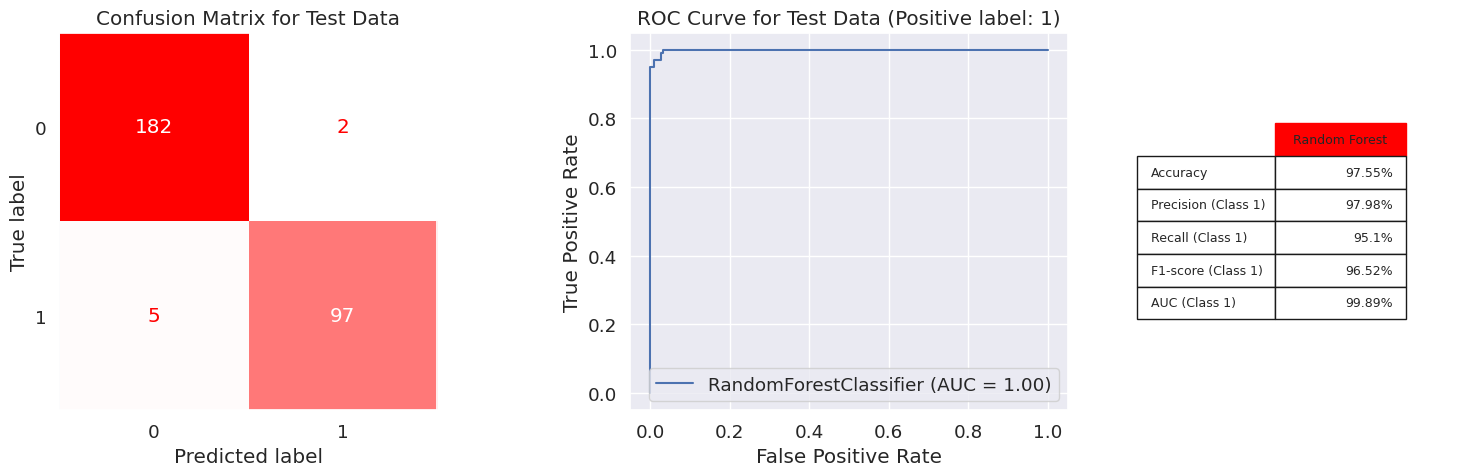

In [35]:
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

<div style="background-color: #cce5ff;padding:10px 12px">

<b>Inference:</b><br>

- <b>Accuracy</b>: 97.55%
  - The model correctly predicts whether an individual has diabetes or not about 98% of the time.<br>

- <b>Precision (class 1)</b>: 97.98%
  - 98% of the individuals predicted as diabetic by the model were actually diabetic.<br>

- <b>Recall (class 1)</b>: 96.1%
  - The model correctly identifies 96% of the actual diabetic individuals.<br>

- <b>F1-score (class 1)</b>: 96.52%
  - The harmonic mean of Precision and Recall.<br>

- <b>AUC (Area Under the ROC Curve) (class 1)</b>: 99.89%
  - Indicates the model's good discriminative power between diabetic and non-diabetic individuals.<br>

- <b>Confusion Matrix</b>:
  - 2 False Positives
  - 5 False Negatives
  - Some misclassifications, but overall effectively minimized.<br>

- <b>Model Generalization</b>:
  - The model is not overfitting, as the metric values for the test and training sets are close together, suggesting good generalization.<br>

Overall, this model demonstrates strong performance in predicting diabetes on the test data, with high accuracy and good precision-recall balance. While there are some misclassifications, the model is performing well and seems to be a reliable tool for diabetes prediction, though further refinement could potentially enhance its performance further.

</div>


In [36]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

Random Forest
Accuracy                   97.55%
Precision (Class 1)        97.98%
Recall (Class 1)            95.1%
F1-score (Class 1)         96.52%
AUC (Class 1)              99.89%

<div id="8"
     style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">8: XGBoost Model Building</h2>
</div>

In [45]:
!pip install scikit-learn

In [46]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

ImportError: sklearn needs to be installed in order to use this module

<a id="8.1"></a>
## 8.1: XGBoost Hyperparameter Tuning

In [38]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [39]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)

NameError: name 'tune_clf_hyperparameters' is not defined

In [40]:
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 350, 'scale_pos_weight': 1.7878048780487805, 'subsample': 0.8}


<a id="8.2"></a>
## 8.2: XGBoost Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       733
           1       0.99      1.00      1.00       410

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       184
           1       0.98      0.97      0.98       102

    accuracy                           0.98       286
   macro avg       0.98      0.98      0.98       286
weighted avg       0.98      0.98      0.98       286



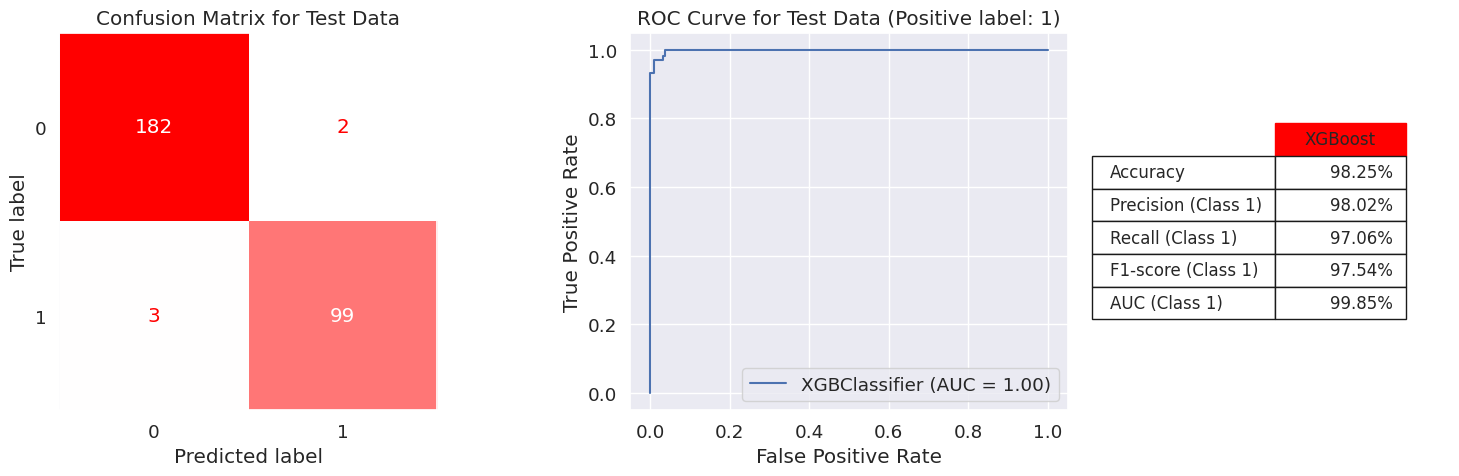

In [41]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

<div style="background-color: #cce5ff;padding:10px 12px">
    
<b>Inference:</b><br>

- <b>Accuracy</b>: 98.25%
  - The model correctly predicts whether an individual has diabetes or not about 97% of the time.<br>

- <b>Precision (Class 1)</b>: 98.02%
  - 98% of the individuals predicted as diabetic by the model were actually diabetic.<br>

- <b>Recall (Class 1)</b>: 97.06%
  - The model correctly identifies 94% of the actual diabetic individuals.<br>

- <b>F1-score (Class 1)</b>: 97.54%
  - The harmonic mean of Precision and Recall.<br>

- <b>AUC (Area Under the ROC Curve) (Class 1)</b>: 99.85%
  - Indicates the model's excellent discriminative power between diabetic and non-diabetic individuals.<br>

- <b>Confusion Matrix</b>:
  - 2 False Positives
  - 3 False Negatives
  - Some misclassifications, but overall effectively minimized.<br>

- <b>Model Generalization</b>:
  - The model is not overfitting, as the metric values for the test and training sets are close together, suggesting good generalization.<br>

Overall, this XGBoost model demonstrates strong performance in predicting diabetes on the test data, with high accuracy and good precision-recall balance. While there are some misclassifications, the model is performing well and seems to be a reliable tool for diabetes prediction, though further refinement could potentially enhance its performance further.

</div>


In [42]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'XGBoost')
xgb_result

XGBoost
Accuracy             98.25%
Precision (Class 1)  98.02%
Recall (Class 1)     97.06%
F1-score (Class 1)   97.54%
AUC (Class 1)        99.85%

<div id="9" style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h2 style="text-align: center;padding:1px 0px 12px; ">9: Conclusion</h2>
</div>

<div style="background-color: #FFCCCC;padding:10px 12px">
    
<b>🔍 Note:</b>
    In the realm of diabetic prediction, <b>recall</b> plays a pivotal role in ensuring comprehensive health management. A high recall implies that the model adeptly identifies a significant portion of individuals with diabetes from the dataset. This is crucial in healthcare, as missing even a single diabetic case (false negatives) could lead to delayed treatment or management, potentially resulting in adverse health outcomes. Therefore, while evaluating diabetic prediction models, prioritizing high recall ensures that the model effectively captures most diabetic cases, enabling timely interventions and improved patient care.

</div>

In [43]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([dt_result, rf_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score (class 1) values
results.sort_values(by='Recall (Class 1)', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color:  #cce5ff', subset='Recall (Class 1)')

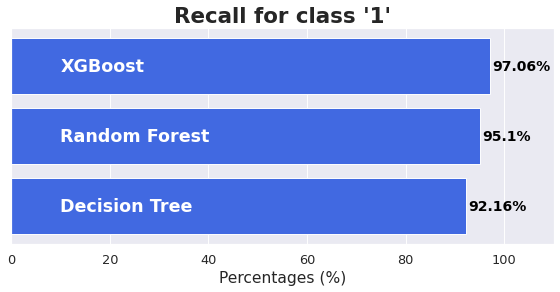

In [44]:
# Prepare values
results.sort_values(by='Recall (Class 1)', ascending=True, inplace=True)
f1_scores = results['Recall (Class 1)'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 4), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("Recall for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="background-color: #cce5ff;padding:10px 12px">
    
Among all the tested classifiers, <b>XGBoost</b> had the best performance in predicting Diabetes:<br>

🏆 <b>Accuracy</b> = 98.25%<br>

🏆 <b>F1-score (Class 1)</b> = 97.54%<br>

🏆 <b>Precision (Class 1)</b> = 98.02%<br>

🏆 <b>Recall (Class 1)</b> = 97.06%<br>

🏆 <b>AUC (Class 1)</b> = 99.85%<br>

</div>



<div style="justify-content: center; align-items: center;  background-color: #FFD580; border-radius: 10px;border:1px solid #ff5800">
    <h5 style="text-align: center;padding:1px 0px 12px; ">If you found this code helpful, your vote would be greatly appreciated. Thank you for your support! 😊</h5>
</div>